In [2]:
import matplotlib.pyplot as plt
import matplotlib
import json_tricks as json
import pandas as pd

In [3]:
results_path = "../../experiments/results/"

In [4]:
# set up exporting
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'pgf.rcfonts': False,
    'axes.unicode_minus': False, # avoid unicode error on saving plots with negative numbers (??)
})

# figure_path = "/home/lauro/documents/msc-thesis/thesis/figures/"
figure_path = "/home/lauro/documents/msc-thesis/paper/latex/figures/"
printsize_singlecolumn = [3.6, 3]
# save figures by using plt.savefig('title of figure')
# remember that latex textwidth is 5.4in
# so use figsize=[5.4, 4], for example

# Funnel dimension sweep

In [5]:
results = json.load(results_path + "funnel-dimension-sweep.json")

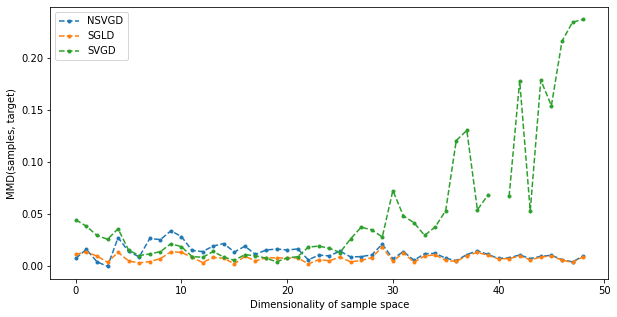

In [7]:
%matplotlib inline
plt.subplots(figsize=[10, 5])

for name, mmds in results.items():
    plt.plot(mmds, "--.", label=name)

plt.ylabel("MMD(samples, target)")
plt.xlabel("Dimensionality of sample space")
plt.legend()
# plt.yscale("log")

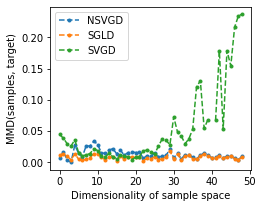

In [11]:
%matplotlib inline
plt.subplots(figsize=printsize_singlecolumn)

for name, mmds in results.items():
    plt.plot(mmds, "--.", label=name)

plt.ylabel("MMD(samples, target)")
plt.xlabel("Dimensionality of sample space")
plt.legend()
# plt.yscale("log")
plt.savefig(figure_path + "funnel-dimension-sweep.pgf")

# Bayesian neural network

In [9]:
sgld_results = pd.read_csv(results_path + "bnn-langevin.csv")
# nsvgd_results = pd.read_csv(results_path + "bnn-nsvgd.csv")

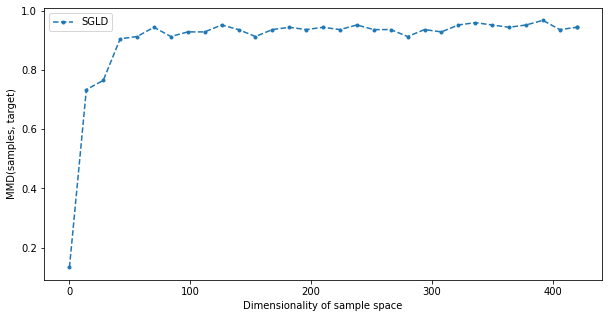

In [12]:
plt.subplots(figsize=[10, 5])

plt.plot(sgld_results.step,  sgld_results.accuracy, "--.", label="SGLD")
# plt.plot(nsvgd_results.step, nsvgd_results.accuracy, "--.", label="NSVGD")

plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.legend()
# plt.yscale("log")